In [16]:
import torch
import dlc_practical_prologue as prologue
from TrainingFramework import TrainingFramework, plot_hist, end_of_hist_result
import time

from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [17]:
def plot_hist_temp(df_history, savefig=None, auxloss=True):
    
    if auxloss:
        f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    else:
        f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
        
    # Loss subplot
    ax1.set_title('Evolution of cross-entropy loss over training')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.yaxis.grid(True)
    sns.lineplot(x='epoch', y='train_loss', data=df_history, label='training', ax=ax1)
    sns.lineplot(x='epoch', y='val_loss', data=df_history, label='validation', ax=ax1)
    
    # Accuracy subplot
    ax2.set_title('Evolution of classification accuracy over training')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.yaxis.grid(True)
    sns.lineplot(x='epoch', y='train_acc', data=df_history, label='training', ax=ax2)
    sns.lineplot(x='epoch', y='val_acc', data=df_history, label='validation', ax=ax2)
    
    if auxloss:
        # Aux Loss subplot
        ax3.set_title('Auxiliary Loss')
        ax3.set_xlabel('Epochs')
        ax3.set_ylabel('Loss')
        ax3.yaxis.grid(True)
        sns.lineplot(x='epoch', y='aux_train_loss', data=df_history, label='training', ax=ax3)
        sns.lineplot(x='epoch', y='aux_val_loss', data=df_history, label='validation', ax=ax3)

        # Accuracy subplot
        ax4.set_title('Auxiliary task accuracy')
        ax4.set_xlabel('Epochs')
        ax4.set_ylabel('Accuracy')
        ax4.yaxis.grid(True)
        sns.lineplot(x='epoch', y='aux_train_acc', data=df_history, label='training', ax=ax4)
        sns.lineplot(x='epoch', y='aux_val_acc', data=df_history, label='validation', ax=ax4)
    
    display(end_of_hist_result(df_history))

    if savefig != None:
        plt.savefig('./results/' + savefig + '.jpg')
    plt.show()

In [2]:
def count_parameters(model):
    nb_params = 0
    for parameter in model.parameters():
        nb_params = nb_params + parameter.numel()
    return nb_params

In [3]:
tf = TrainingFramework(validationProp=0.2,
                       batchsize=100,
                       mainLoss=nn.CrossEntropyLoss(),
                       auxLoss=None
)

trn : torch.Size([1000, 2, 14, 14]) 
trnY : torch.Size([1000]) 
trnAuxY : torch.Size([2, 1000])


### Arch1

In [29]:
class Arch1(nn.Module):
    def __init__(self, nb_hidden=128):
        super(Arch1, self).__init__()
        self.conv1 = nn.Conv2d(2, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=5, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=4, stride=4) 
        self.fc1 = nn.Linear(64, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = F.relu(x)
        x = self.fc1(x.view(-1, 64))
        x = F.relu(x)
        x = self.fc2(x)
        return x
    
A1 = Arch1()
print(count_parameters(A1))

67106


In [6]:
hist, times = tf.validateModel(Arch1)

'Epoch 50/50'

,train_loss,train_acc,val_loss,val_acc,aux_train_loss,aux_train_acc,aux_val_loss,aux_val_acc,epoch
last,0.000168,1.0,0.945527,0.8061,NaN,NaN,NaN,NaN,49
best,0.000310,1.0,0.893732,0.8064,NaN,NaN,NaN,NaN,44


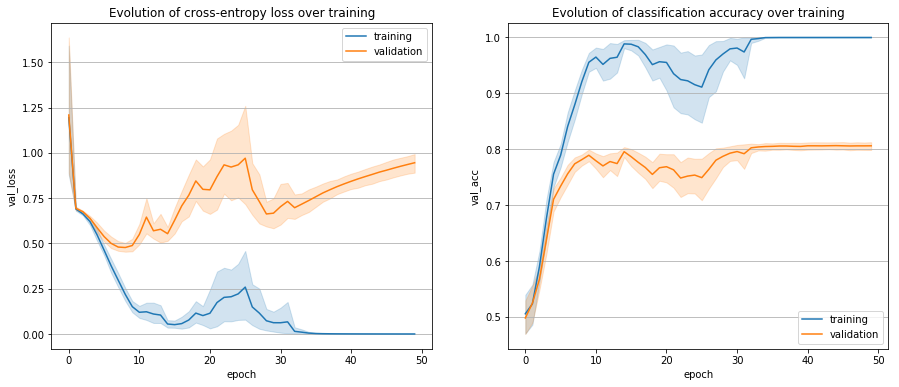

In [18]:
plot_hist_temp(hist, auxloss=False)

In [27]:
times

[17.173835827000175,
 15.982930085000135,
 16.84118958299996,
 16.098837817999993,
 14.494821223000145,
 15.606990873000086,
 15.462755669000217,
 16.96991558799982,
 17.46956316700016,
 17.999671286999728]

In [30]:
hist1, times1 = tf.validateModel(Arch1, epochs=25, eta=0.005)

'Epoch 25/25'

,train_loss,train_acc,val_loss,val_acc,aux_train_loss,aux_train_acc,aux_val_loss,aux_val_acc,epoch
last,0.129410,0.9514,1.110512,0.7401,NaN,NaN,NaN,NaN,24
best,0.128915,0.9487,0.945586,0.7430,NaN,NaN,NaN,NaN,20


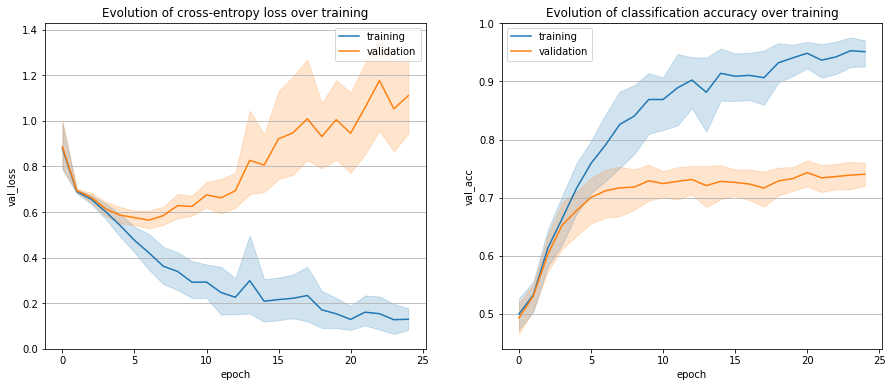

In [31]:
plot_hist_temp(hist1, auxloss=False)

In [32]:
hist1, times1 = tf.validateModel(Arch1, epochs=25, eta=0.0005)

'Epoch 25/25'

,train_loss,train_acc,val_loss,val_acc,aux_train_loss,aux_train_acc,aux_val_loss,aux_val_acc,epoch
last,0.192247,0.9195,0.793847,0.7469,NaN,NaN,NaN,NaN,24
best,0.057227,0.9868,0.569584,0.7864,NaN,NaN,NaN,NaN,18


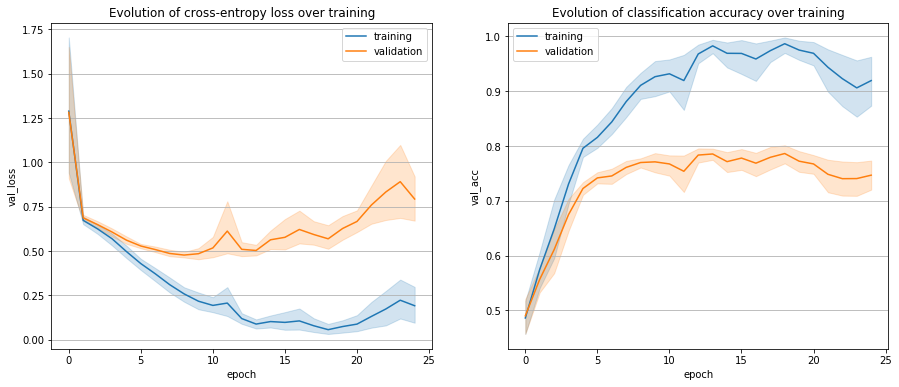

In [33]:
plot_hist_temp(hist1, auxloss=False)

### Arch2

In [20]:
class Arch2(nn.Module):
    def __init__(self, nb_hidden=128):
        super(Arch2, self).__init__()
        self.conv1 = nn.Conv2d(2, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=5, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=5, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=4, stride=4) 
        self.fc1 = nn.Linear(64, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = F.relu(x)
        x = self.fc1(x.view(-1, 64))
        x = F.relu(x)
        x = self.fc2(x)
        return x
    
A2 = Arch2()
print(count_parameters(A2))

71202


In [21]:
hist2, times2 = tf.validateModel(Arch2)

'Epoch 50/50'

,train_loss,train_acc,val_loss,val_acc,aux_train_loss,aux_train_acc,aux_val_loss,aux_val_acc,epoch
last,0.000199,1.0,1.091135,0.8047,NaN,NaN,NaN,NaN,49
best,0.000222,1.0,1.074754,0.8049,NaN,NaN,NaN,NaN,48


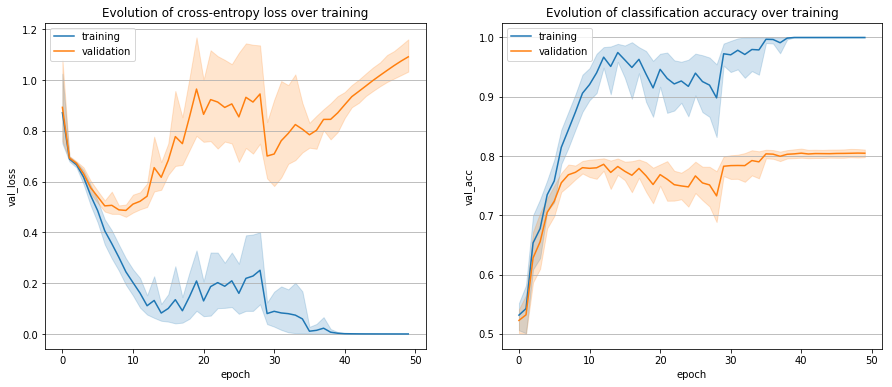

In [22]:
plot_hist_temp(hist2, auxloss=False)

### Arch3

In [38]:
class Arch3(nn.Module):
    def __init__(self, nb_hidden=128):
        super(Arch3, self).__init__()
        self.conv1 = nn.Conv2d(2, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=4, stride=4) 
        self.fc1 = nn.Linear(64, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = F.relu(x)
        x = self.fc1(x.view(-1, 64))
        x = F.relu(x)
        x = self.fc2(x)
        return x
    
A3 = Arch3()
print(count_parameters(A3))

68946


In [36]:
hist3, times3 = tf.validateModel(Arch3)

'Epoch 50/50'

,train_loss,train_acc,val_loss,val_acc,aux_train_loss,aux_train_acc,aux_val_loss,aux_val_acc,epoch
last,0.000635,1.0000,0.770452,0.8172,NaN,NaN,NaN,NaN,49
best,0.004034,0.9998,0.686826,0.8176,NaN,NaN,NaN,NaN,41


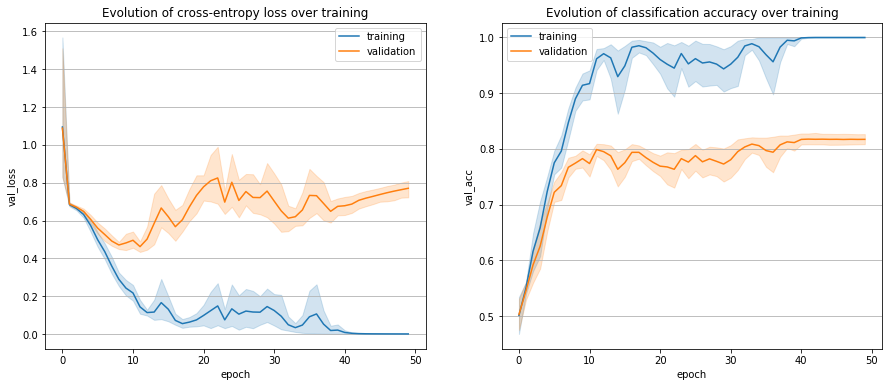

In [37]:
plot_hist_temp(hist3, auxloss=False)

### Arch4

In [41]:
class Arch4(nn.Module):
    def __init__(self, nb_hidden=128):
        super(Arch4, self).__init__()
        self.conv1 = nn.Conv2d(2, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) 
        self.fc1 = nn.Linear(64, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.conv5(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = F.relu(x)
        x = self.fc1(x.view(-1, 64))
        x = F.relu(x)
        x = self.fc2(x)
        return x
    
A4 = Arch4()
print(count_parameters(A4))

78194


In [42]:
hist4, times4 = tf.validateModel(Arch4)

'Epoch 50/50'